` 프로젝트 수행자 : 김경훈 `

# 1. 데이터 불러오기

In [1]:
from tensorflow.keras.datasets import reuters

def get_data(num_words=None):
    (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)
    
    return x_train, y_train, x_test, y_test

# 2. 전처리

In [2]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = { index + 3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def decode_data(data):
    result = []
    for i in range(len(data)):
        t = ' '.join([index_to_word[index] for index in data[i]])
        result.append(t)
    return result


def vectorize_data(train, test):
    
    _train = decode_data(train)
    _test = decode_data(test)
    
    dtmvector = CountVectorizer()
    train_dtm = dtmvector.fit_transform(_train)
    
    tfidf_transformer = TfidfTransformer()
    tfidfv_train = tfidf_transformer.fit_transform(train_dtm)
    
    test_dtm = dtmvector.transform(_test)
    tfidfv_test = tfidf_transformer.transform(test_dtm)
    
    return tfidfv_train, tfidfv_test

# 3. 실험 설계 및 수행

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

import os
import pandas as pd

columns = ['나이브 베이즈 분류기', 'CNB', '로지스틱 회귀', '서포트 벡터 머신', '결정 트리', '랜덤 포레스트', '그래디언트 부스팅 트리', '보팅']

def experiment(num_words=None):
    
    key = 'All' if num_words is None else f'{str(num_words // 1000) + "k"}'
    
    print(f'### experiment start - {key}')
    
    if f'accuracy_{key}.csv' not in os.listdir('./results'):

        x_train, y_train, x_test, y_test = get_data(num_words=num_words)
    
        tfidfv_train, tfidfv_test = vectorize_data(x_train, x_test)
        
        accuracy = []
        f1 = []
        
        for model in [
            MultinomialNB(), 
            ComplementNB(), 
            LogisticRegression(C=10000, penalty='l2'),
            LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False),
            DecisionTreeClassifier(max_depth=10, random_state=0),
            RandomForestClassifier(n_estimators=5, random_state=0),
            GradientBoostingClassifier(random_state=0),
            VotingClassifier(estimators=[
                ('cb', ComplementNB()),
                ('grbt', GradientBoostingClassifier(random_state=0))], voting='soft', n_jobs=-1)]:
            
            model.fit(tfidfv_train, y_train)
            predict = model.predict(tfidfv_test)
            
            accuracy.append(accuracy_score(y_test, predict))
            f1.append(f1_score(y_test, predict, average='micro'))
        
        accuracy_df = pd.DataFrame([accuracy], columns=columns)
        accuracy_df.to_csv(f'./results/accuracy_{key}.csv', index=False)
        
        f1_df = pd.DataFrame([f1], columns=columns)
        f1_df.to_csv(f'./results/f1_{key}.csv', index=False)
        
    print(f'### experiment end - {key}')

In [7]:
for num_words in [None, 5000, 10000, 15000, 20000]:
    experiment(num_words=num_words)

### experiment start - All


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### experiment end - All
### experiment start - 5k


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### experiment end - 5k
### experiment start - 10k


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### experiment end - 10k
### experiment start - 15k


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### experiment end - 15k
### experiment start - 20k


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### experiment end - 20k


# 4. 결과 확인

In [9]:
import pandas as pd

def concatenate_result(_type):
    result = []
    for num_words in ['5k', '10k', '15k', '20k', 'All']:
        _df = pd.read_csv(f'./results/{_type}_{num_words}.csv')
        _df.index.name = 'num_words'
        _df.index = [f'{num_words}']
        result.append(_df)
    
    return pd.concat(result)

In [10]:
concatenate_result('accuracy')

,나이브 베이즈 분류기,CNB,로지스틱 회귀,서포트 벡터 머신,결정 트리,랜덤 포레스트,그래디언트 부스팅 트리,보팅
5k,0.673197,0.770703,0.805877,0.772930,0.617988,0.701247,0.767587,0.772930
10k,0.656723,0.770703,0.807658,0.770703,0.620214,0.674087,0.766251,0.771594
15k,0.633126,0.772039,0.812556,0.780499,0.619323,0.671416,0.770703,0.772930
20k,0.619323,0.767142,0.809884,0.785841,0.621104,0.671416,0.770258,0.773820
All,0.599733,0.764915,0.813446,0.780499,0.621104,0.654497,0.770258,0.773820


In [11]:
concatenate_result('f1')

,나이브 베이즈 분류기,CNB,로지스틱 회귀,서포트 벡터 머신,결정 트리,랜덤 포레스트,그래디언트 부스팅 트리,보팅
5k,0.673197,0.770703,0.805877,0.772930,0.617988,0.701247,0.767587,0.772930
10k,0.656723,0.770703,0.807658,0.770703,0.620214,0.674087,0.766251,0.771594
15k,0.633126,0.772039,0.812556,0.780499,0.619323,0.671416,0.770703,0.772930
20k,0.619323,0.767142,0.809884,0.785841,0.621104,0.671416,0.770258,0.773820
All,0.599733,0.764915,0.813446,0.780499,0.621104,0.654497,0.770258,0.773820


# 5. 딥러닝 모델 성능 확인

In [20]:
import os
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.layers import Dense, LSTM, Embedding
from keras.models import Sequential
from keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd

def d_experiment(num_words=None):
    
    key = 'All' if num_words is None else f'{str(num_words // 1000) + "k"}'
    
    
        
    x_train, y_train, x_test, y_test = get_data(num_words=num_words)
    tfidfv_train, tfidfv_test = vectorize_data(x_train, x_test)

    num_classes = max(y_train) + 1

    word_vector_dim = 32  

    model = Sequential()
#         model.add(Embedding(num_words, word_vector_dim))
#         model.add(LSTM(128))

    model.add(Dense(128, activation='relu', input_shape=(tfidfv_train.todense().shape[1],)))  

    model.add(Dense(128, activation='relu')) 
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  

    model.summary()

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

    history = model.fit(tfidfv_train.todense(), #.toarray(),
                        y_train,
                        epochs=50,
                        batch_size=64,
                        callbacks=[es],
                        validation_split=0.2,
                        verbose=1)

    predict = model.predict(tfidfv_test.todense()).argmax(axis=1)

    return history, y_test, predict

In [27]:
import matplotlib.pyplot as plt

def show_history(key, history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{key} accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{key} loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [29]:
from sklearn.metrics import classification_report

def show_report(y, pred):
    print(classification_report(y, pred))

## 5.1 단어수 5000

In [23]:
history_5k, y_5k, pred_5k = d_experiment(num_words=5000)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               623104    
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_34 (Dense)             (None, 46)                2990      
Total params: 650,862
Trainable params: 650,862
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
113/113 [==============================] - 1s 5ms/step - loss: 2.1489 - accuracy: 0.4825 - val_loss: 1.4509 - val_accuracy: 0.6667
Epoch 2/50
113/113 [==============================] - 0s 3ms/step - loss: 1.1667 - accuracy: 0.7196 - va

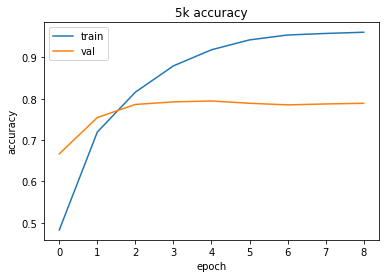

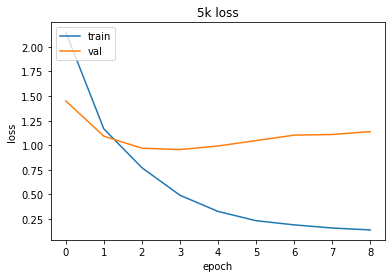

In [28]:
show_history('5k', history_5k)

In [31]:
show_report(y_5k, pred_5k)

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.70      0.74      0.72       105
           2       0.67      0.60      0.63        20
           3       0.90      0.94      0.92       813
           4       0.83      0.88      0.85       474
           5       1.00      0.20      0.33         5
           6       0.89      0.57      0.70        14
           7       0.50      0.33      0.40         3
           8       0.53      0.68      0.60        38
           9       0.82      0.72      0.77        25
          10       0.93      0.90      0.92        30
          11       0.56      0.77      0.65        83
          12       0.60      0.23      0.33        13
          13       0.71      0.59      0.65        37
          14       0.33      0.50      0.40         2
          15       0.67      0.22      0.33         9
          16       0.70      0.72      0.71        99
          17       0.50    

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5.2 단어수 10000

In [32]:
history_10k, y_10k, pred_10k = d_experiment(num_words=10000)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 128)               1237888   
_________________________________________________________________
dense_36 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_38 (Dense)             (None, 46)                2990      
Total params: 1,265,646
Trainable params: 1,265,646
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
113/113 [==============================] - 1s 6ms/step - loss: 2.1246 - accuracy: 0.5222 - val_loss: 1.4215 - val_accuracy: 0.6700
Epoch 2/50
113/113 [==============================] - 0s 4ms/step - loss: 1.1371 - accuracy: 0.7297

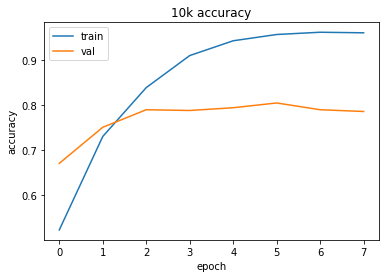

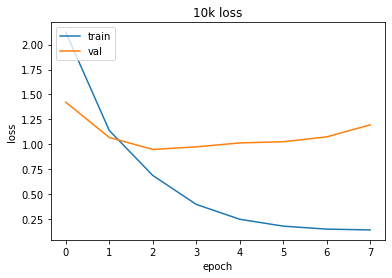

In [33]:
show_history('10k', history_10k)

In [34]:
show_report(y_10k, pred_10k)

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.63      0.82      0.71       105
           2       0.83      0.50      0.62        20
           3       0.87      0.95      0.91       813
           4       0.86      0.84      0.85       474
           5       0.00      0.00      0.00         5
           6       0.91      0.71      0.80        14
           7       1.00      0.33      0.50         3
           8       0.64      0.47      0.55        38
           9       0.83      0.80      0.82        25
          10       0.96      0.73      0.83        30
          11       0.54      0.75      0.63        83
          12       0.67      0.15      0.25        13
          13       0.62      0.65      0.63        37
          14       1.00      0.50      0.67         2
          15       0.40      0.22      0.29         9
          16       0.78      0.67      0.72        99
          17       0.67    

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5.3 단어수 15000

In [35]:
history_15k, y_15k, pred_15k = d_experiment(num_words=15000)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 128)               1821184   
_________________________________________________________________
dense_40 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_41 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_42 (Dense)             (None, 46)                2990      
Total params: 1,848,942
Trainable params: 1,848,942
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
113/113 [==============================] - 1s 7ms/step - loss: 2.1751 - accuracy: 0.4919 - val_loss: 1.4590 - val_accuracy: 0.6650
Epoch 2/50
113/113 [==============================] - 0s 4ms/step - loss: 1.1549 - accuracy: 0.7211

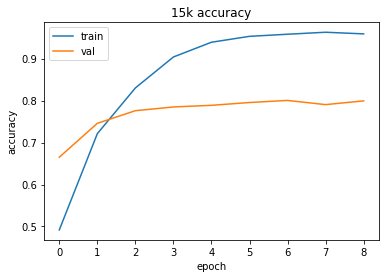

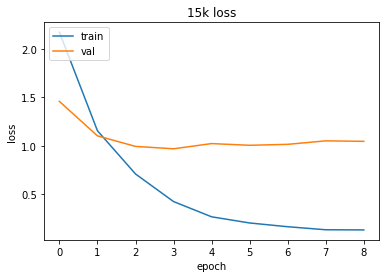

In [36]:
show_history('15k', history_15k)

In [37]:
show_report(y_15k, pred_15k)

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.72      0.77      0.75       105
           2       0.61      0.55      0.58        20
           3       0.92      0.91      0.91       813
           4       0.77      0.88      0.82       474
           5       0.50      0.20      0.29         5
           6       0.92      0.86      0.89        14
           7       1.00      0.33      0.50         3
           8       0.66      0.66      0.66        38
           9       0.81      0.84      0.82        25
          10       0.93      0.87      0.90        30
          11       0.73      0.70      0.72        83
          12       0.23      0.23      0.23        13
          13       0.63      0.59      0.61        37
          14       0.00      0.00      0.00         2
          15       0.33      0.11      0.17         9
          16       0.64      0.77      0.70        99
          17       0.50    

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5.4 단어수 20000

In [38]:
history_20k, y_20k, pred_20k = d_experiment(num_words=20000)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 128)               2365440   
_________________________________________________________________
dense_44 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_45 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_46 (Dense)             (None, 46)                2990      
Total params: 2,393,198
Trainable params: 2,393,198
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
113/113 [==============================] - 1s 9ms/step - loss: 2.1907 - accuracy: 0.4932 - val_loss: 1.4265 - val_accuracy: 0.6383
Epoch 2/50
113/113 [==============================] - 1s 5ms/step - loss: 1.1195 - accuracy: 0.7276

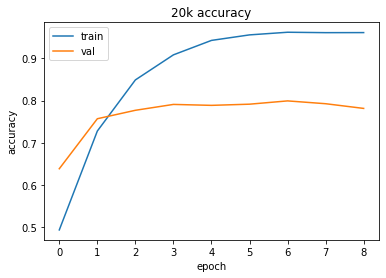

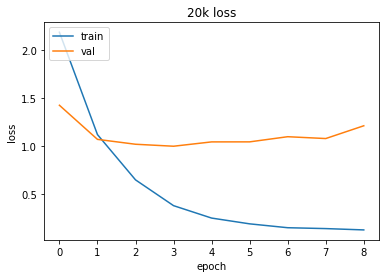

In [39]:
show_history('20k', history_20k)

In [40]:
show_report(y_20k, pred_20k)

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.71      0.77      0.74       105
           2       0.50      0.60      0.55        20
           3       0.83      0.96      0.89       813
           4       0.80      0.85      0.83       474
           5       0.00      0.00      0.00         5
           6       0.83      0.71      0.77        14
           7       1.00      0.33      0.50         3
           8       0.63      0.58      0.60        38
           9       0.95      0.80      0.87        25
          10       0.96      0.77      0.85        30
          11       0.79      0.60      0.68        83
          12       0.80      0.31      0.44        13
          13       0.65      0.54      0.59        37
          14       0.25      0.50      0.33         2
          15       0.67      0.22      0.33         9
          16       0.62      0.77      0.69        99
          17       0.20    

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
